In [81]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import pandas as pd
from astropy.table import Table
from scipy.interpolate import interp1d
import sys
sys.path.append('../analysis/')
import read_mist_models
import analysis_utils

highlight = np.array((66, 135, 245))/255
red = '#FE4365'
blue = '#00A9FF'
yellow = '#ECA25C'
green = '#3F9778'
darkblue = '#005D7F'
pl.rc('image', cmap='plasma')

In [82]:
import os
data = pd.DataFrame()
for file in os.listdir('../output/txtoutput'):
    print("reading file: {0}".format(file))
    data = data.append(pd.read_csv('../output/txtoutput/'+file, skiprows=1, delimiter='\t'))

reading file: out8.dat
reading file: out18.dat
reading file: out16.dat
reading file: out112.dat
reading file: out17.dat
reading file: out15.dat
reading file: out111.dat
reading file: out14.dat
reading file: out13.dat
reading file: out102.dat
reading file: out12.dat
reading file: out3.dat
reading file: out2.dat
reading file: out0.dat
reading file: out1.dat
reading file: out5.dat
reading file: out4.dat
reading file: out6.dat
reading file: out7.dat


In [83]:
k2dr2 = Table.read('../analysis/k2_dr2_1arcsec.fits', format='fits')
k2dr2 = k2dr2.to_pandas()
#epic = Table.read('../analysis/epic.fits', format='fits')
#epic = epic.to_pandas()
df = pd.merge(k2dr2, data, left_on='epic_number', right_on='epic')
#df = pd.merge(df, epic, left_on='epic_number', right_on='ID')
df = df.drop_duplicates(subset='epic_number')

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: TableReplaceWarning: converted column 'r_result_flag' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: TableReplaceWarning: converted column 'r_modality_flag' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: TableReplaceWarning: converted column 'k2_kepmagerr' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


In [84]:
import imp
imp.reload(analysis_utils)
ms = analysis_utils.selectms(
    df, 
    '../analysis/MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd', 
    bp_rp_range=(0.0, 5.0),
    g_rp_range=(0.0, 5.0),
    width=(-0.6, 0.6)
)

Reading in: ../analysis/MIST_v1.2_feh_p0.50_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd


/usr/local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.5, 4.5)

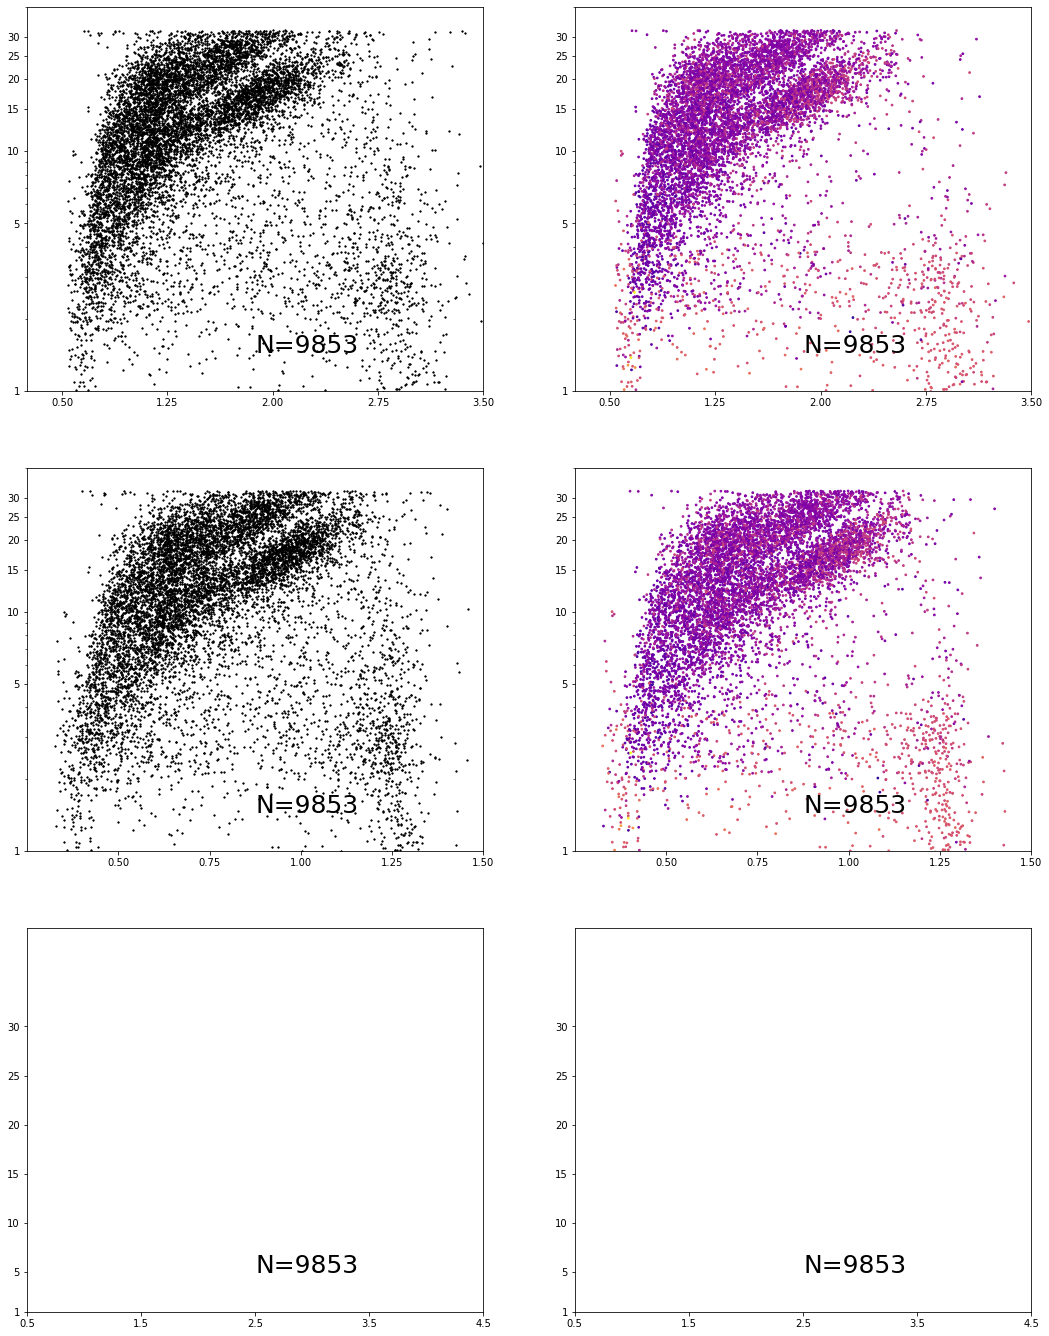

In [85]:
good_P = ms['P_mean'] / ms['P_sd'] > 15
good_P = good_P & (ms['P_mean'] < 32)
#good_P = good_P & (np.abs(ms['P_r_hat'] - 1.0) < 0.1)
good_P = good_P & ((ms['logamp_mean'] - ms['logS0_mean']) > np.log(1e-3))
#good_P = good_P & (ms['mix_mean'] > 0.15)
#color = ms['P_mean'] - ms['P_mode']
#color = ms['mix_mode']
tau1 = ms['P_mean']*np.sqrt(np.exp(ms['logQ0_mean'])**2 - 1)
tau2 = ms['P_mean']*np.sqrt((np.exp(ms['logQ0_mean'])+ np.exp(ms['logdQ_mean']))**2 - 1)
color = np.log(tau1 + tau2)

fig, axs = pl.subplots(3, 2, figsize=(18, 24))
axs[0, 0].semilogy(ms[good_P]['bp_rp'], ms[good_P]['P_mean'], '.', color='k', 
            markeredgewidth=0.75, markeredgecolor='k', alpha=1, markersize=3)
axs[0, 1].scatter(ms[good_P]['bp_rp'], ms[good_P]['P_mean'], c=color[good_P], alpha=1, s=3)
axs[0, 1].set_yscale('log')

axs[1, 0].semilogy(ms[good_P]['g_rp'], ms[good_P]['P_mean'], '.', color='k', 
            markeredgewidth=0.75, markeredgecolor='k', alpha=1, markersize=3)
axs[1, 1].scatter(ms[good_P]['g_rp'], ms[good_P]['P_mean'], c=color[good_P], alpha=1, s=3)
axs[1, 1].set_yscale('log')

#axs[2, 0].semilogy(ms[good_P]['phot_g_mean_mag']-ms[good_P]['Ksmag'], ms[good_P]['P_mean'], '.', color='k', 
#            markeredgewidth=0.75, markeredgecolor='k', alpha=1)
#axs[2, 1].scatter(ms[good_P]['phot_g_mean_mag']-ms[good_P]['Ksmag'], ms[good_P]['P_mean'], c=color[good_P], alpha=1, s=3)
#axs[2, 1].set_yscale('log')

[ax.yaxis.set_major_formatter(pl.ScalarFormatter()) for ax in axs.flatten()]
[ax.set_yticks([1, 5, 10, 15, 20, 25, 30]) for ax in axs.flatten()]
[ax.set_xticks(np.linspace(0.5, 3.5, 5)) for ax in axs[0]]
[ax.set_xticks(np.linspace(0.5, 1.5, 5)) for ax in axs[1]]
[ax.set_xticks(np.linspace(0.5, 4.5, 5)) for ax in axs[2]]
[ax.annotate('N={0}'.format(np.sum(good_P)), xy=(0.5, 0.1), 
            xycoords='axes fraction', fontsize=25) for ax in axs.flatten()]
[ax.set_ylim(1, 40) for ax in axs.flatten()]
#[ax.axhline(0.5) for ax in axs.flatten()]
axs[1, 0].set_xlim(0.25, 1.5)
axs[1, 1].set_xlim(0.25, 1.5)
axs[0, 0].set_xlim(0.25, 3.5)
axs[0, 1].set_xlim(0.25, 3.5)
axs[2, 0].set_xlim(0.5, 4.5)
axs[2, 1].set_xlim(0.5, 4.5)

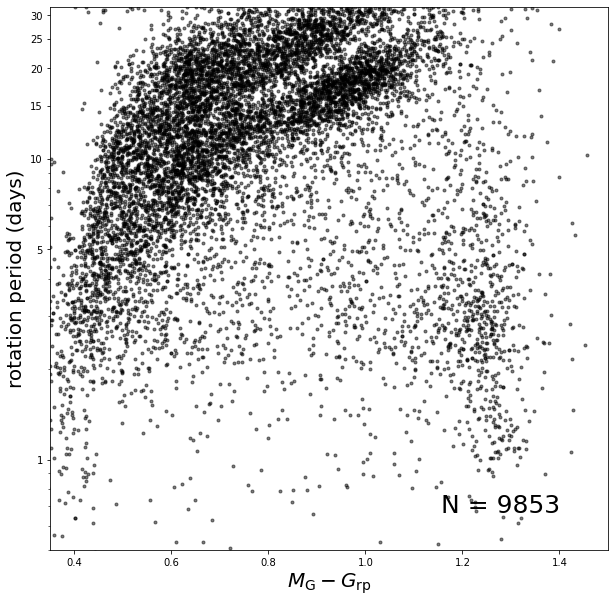

In [86]:
pl.figure(figsize=(10, 10))
pl.semilogy(ms[good_P]['g_rp'], ms[good_P]['P_mean'], 'k.', alpha=0.5)
pl.yscale('log')
pl.xlim(0.35, 1.5)
pl.ylim(0.5, 32)
pl.gca().yaxis.set_major_formatter(pl.ScalarFormatter())
pl.gca().set_yticks([1, 5, 10, 15, 20, 25, 30])
pl.gca().annotate('N = {0}'.format(len(ms[good_P])), xy=(0.7, 0.07), xycoords='axes fraction', fontsize=25)
pl.xlabel(r'$M_\mathrm{G} - G_\mathrm{rp}$', fontsize=20)
pl.ylabel('rotation period (days)', fontsize=20)
pl.savefig('/Users/tgordon/Desktop/period_color.pdf')

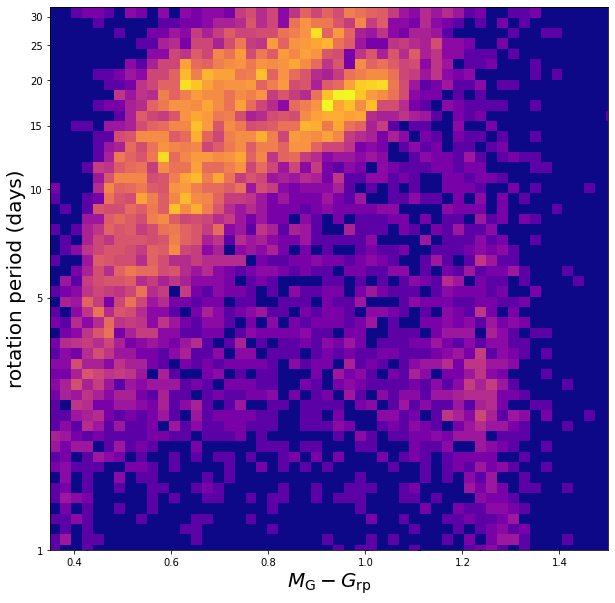

In [87]:
from matplotlib import colors
pl.figure(figsize=(10, 10))
h = pl.hist2d(ms[good_P]['g_rp'], np.log(ms[good_P]['P_mean']), bins=70, cmin=0, norm=colors.PowerNorm(0.5), zorder=0.5)
pl.scatter(ms[good_P]['g_rp'], np.log(ms[good_P]['P_mean']), s=2, color='k', zorder=0)
#pl.yscale('log')
pl.ylim(0, np.log(32))
pl.xlim(0.35, 1.5)
pl.gca().yaxis.set_major_formatter(pl.ScalarFormatter())
pl.gca().set_yticks(np.log([1, 5, 10, 15, 20, 25, 30]))
pl.gca().set_yticklabels([1, 5, 10, 15, 20, 25, 30]);
pl.xlabel(r'$M_\mathrm{G} - G_\mathrm{rp}$', fontsize=20)
pl.ylabel('rotation period (days)', fontsize=20)
pl.savefig('/Users/tgordon/Desktop/period_color_density.pdf')